# Exploratory Data Analysis (EDA) Assignment 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataURL = r'https://raw.githubusercontent.com/akarshsingh9/AppliedAI_Projects/master/haberman.csv'
habermanDF = pd.read_csv(dataURL)
habermanDF.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Information on Haberman data



**1. What is the data about?**

**Ans:** The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**2. Number of Attributes and there relevance ?**

**Ans.** There are 4 attributes including class attribute.
  
  Attribute Information:
  
  * Age of patient at time of operation (numerical)
  * Patient's year of operation (year - 1900, numerical)
  * Number of positive axillary nodes detected (numerical)
  * Survival status (class attribute) 
  
  1 = the patient survived 5 years or longer                                  
  2 = the patient died within 5 year.  

**3. What is positive auxilary node ?**

**Ans.** A lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present. 

**Sources:** 

[Kaggle](https://www.kaggle.com/gilsousa/habermans-survival-data-set)
, [National Cancer Institute](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/positive-axillary-lymph-node)



In [0]:
#summary stats for Age column
habermanDF['Age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [0]:
#Op_Year summary stats 
habermanDF['Op_Year'].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: Op_Year, dtype: float64

In [0]:
#Axil_nodes summary stats
habermanDF['axil_nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: axil_nodes, dtype: float64

In [0]:
#Surv_status summary stats
habermanDF['Surv_status'].describe()

count    306.000000
mean       1.264706
std        0.441899
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Surv_status, dtype: float64

In [0]:
# NaN values
habermanDF.isna().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [0]:
# null values
habermanDF.isnull().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

#### Observations:

Above results show summary stats for each column in haberman dataset. Here are my observations based on the given numbers.

1. Total number of data points in each column are 306
2. Age column - Age of the patient lies between 30 years to 83 years, mean age is 52.457516. Age column is a continuous quantitative variable (holds numerical values).
3. Op_Year column - Haberman data is collected between the year 1958 to 1970. The column has minimum year has 1958 and maximum year as 1969. These are 11 countable years. Therefore this column is discrete quantitative variable (holds numerical values).
4. axil_nodes - this column tells how many positive axillary nodes detected in the patient and can take any natural number. This column is continuous quantitative variable. Looking at max, mean and min values and interquatile range values. There is a possibility max value is an outlier or just that the patient happens to have that many axillary nodes and is in a serious condition. 
5. Surv_status - this column has binary values 1 or 2. This is a categorical variable (qualitative). There are only 2 possibilities patient who survived more than equal to 5 years and patitent that died within 5 years.
6. This dataset has no NaN or NULL values.     

### Univariate Analysis

In [0]:
#initialize variables

# continuous quantitative
age = habermanDF['Age']
axil_nodes = habermanDF['axil_nodes']

#discrete quantitative
op_year = habermanDF['Op_Year']

#categorical/qualitative
surv_status = habermanDF['Surv_status'] 

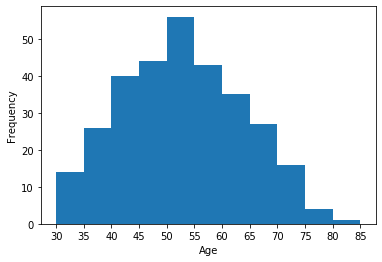

In [0]:
#histogram - Age
bin_age = np.arange(age.min(), age.max()+5, 5);
sns.distplot(age,bins = bin_age, kde=False,hist_kws = {'alpha' : 1});
plt.xticks(bin_age);
plt.ylabel('Frequency');

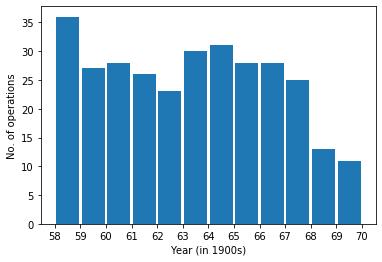

In [0]:
#histogram - Op_Year
bin_year = np.arange(op_year.min(),op_year.max()+2,1);
plt.hist(op_year,bins=bin_year,rwidth=0.9);
plt.xticks(bin_year);
plt.xlabel("Year (in 1900s)");
plt.ylabel("No. of operations");

In [0]:
print("To verify above histogram, here is actual freq for each year")
for i in range(0,bin_year.size):
   print("Year 19{0} = {1}".format(bin_year[i],op_year[op_year == bin_year[i]].count()))

To verify above histogram, here is actual freq for each year
Year 1958 = 36
Year 1959 = 27
Year 1960 = 28
Year 1961 = 26
Year 1962 = 23
Year 1963 = 30
Year 1964 = 31
Year 1965 = 28
Year 1966 = 28
Year 1967 = 25
Year 1968 = 13
Year 1969 = 11
Year 1970 = 0


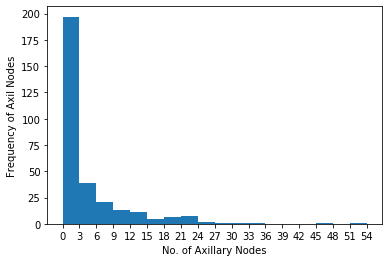

In [0]:
#histogram - axil_nodes
bin_nodes = np.arange(axil_nodes.min(),axil_nodes.max()+3,3);
sns.distplot(axil_nodes,bins=bin_nodes,kde=False,hist_kws = {'alpha' : 1});
plt.xticks(bin_nodes);
plt.xlabel("No. of Axillary Nodes");
plt.ylabel("Frequency of Axil Nodes");

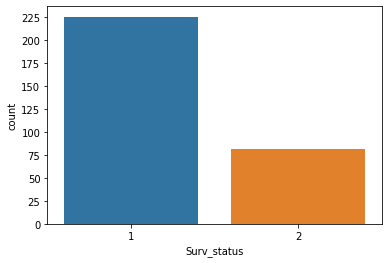

In [0]:
#Bar chart - Surv_status
sns.countplot(surv_status);
y = np.arange(0,250,25);
plt.yticks(y);

In [0]:
# Number of surv_status = 1 
survived = surv_status[surv_status == 1].count()
print(survived)
print(survived/surv_status.count())

225
0.7352941176470589


In [0]:
# Number of surv_status = 2 
not_survived = surv_status[surv_status == 2].count()
print(not_survived)
print(not_survived/surv_status.count())

81
0.2647058823529412


#### Observations:

1. **Age Histogram :** A unimodal plot can be observed. The dataset has maximum number of patients from age range 50 - 55 yrs and least number of patients from age range 80 - 85 yrs. 
2. **Op_Year Histogram :** Maximum number of operations were performed in the year 1958 and least number of opertions were done in 1969
3. **axil_nodes Histogram :** Maximum patients were observed to have less than 6 positive axillary nodes. Very few patients have positive axillary nodes greater than 24. Histogram is left skewed. 
4. **Surv_Status bar chart :** Majority of the patients survived more than 5 yrs after the treatment, 225 patients out of 306 to be exact, which is around 73.5 % success rate. 81 patients died within 5 years of treatment, which is around 26.5 % 

### Bivariate Analysis

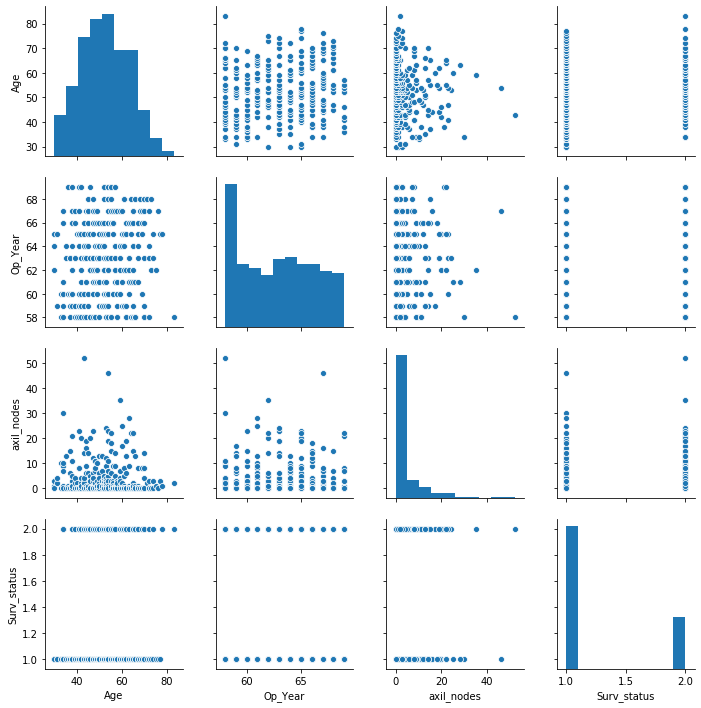

In [0]:
# PairPlot across all variables
sns.pairplot(habermanDF,kind='scatter');

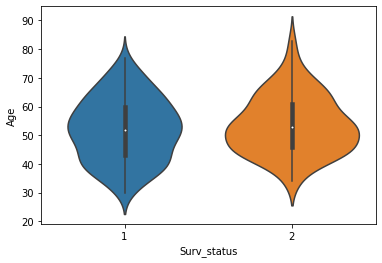

In [0]:
# violin plot - Surv_status vs Age
sns.violinplot(data=habermanDF,x='Surv_status',y='Age');

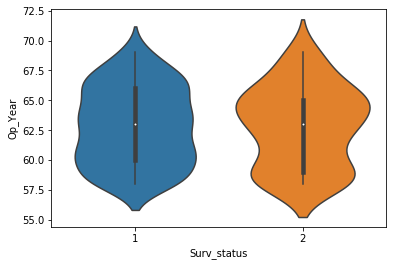

In [0]:
# violin plot - Surv_status vs Op_Year
sns.violinplot(data=habermanDF,x='Surv_status',y='Op_Year');

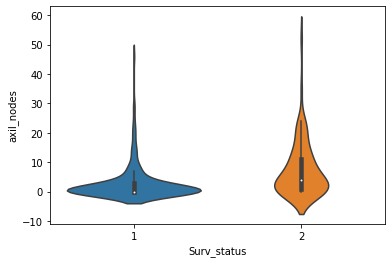

In [0]:
# violin plot - Surv_status vs axil_nodes
sns.violinplot(data=habermanDF,x='Surv_status',y='axil_nodes');

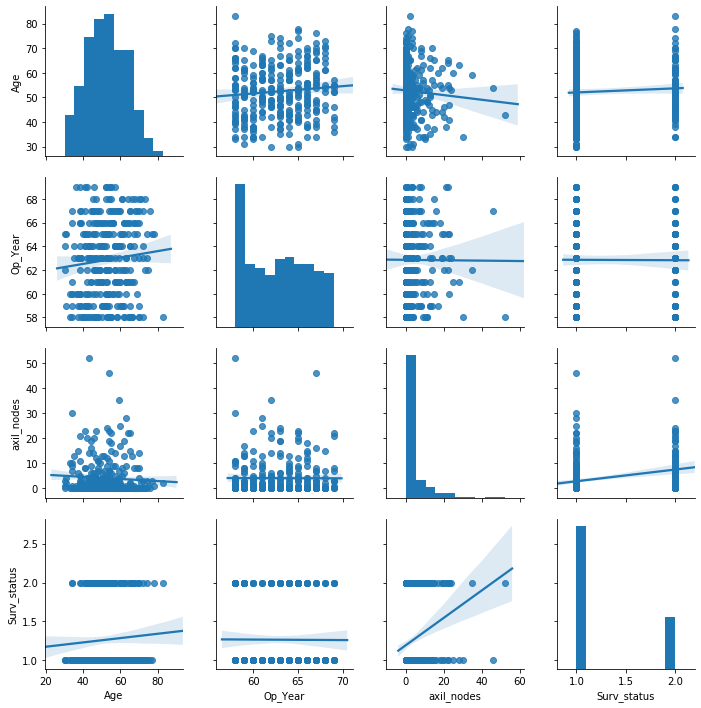

In [0]:
#regression line
sns.pairplot(habermanDF,kind='reg');

In [0]:
# correlation
habermanDF.corr()

,Age,Op_Year,axil_nodes,Surv_status
Age,1.000000,0.089529,-0.063176,0.067950
Op_Year,0.089529,1.000000,-0.003764,-0.004768
axil_nodes,-0.063176,-0.003764,1.000000,0.286768
Surv_status,0.067950,-0.004768,0.286768,1.000000
